### Air Pollution

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfx=pd.read_csv("./Train.csv")
dfy=pd.read_csv("./Test.csv")

In [4]:
dfx.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
dfy.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [6]:
X_train=dfx.values
X_test=dfy.values

### Analyzing The Data

In [7]:
print(X_train.shape)
print(X_test.shape)

(1600, 6)
(400, 5)


In [11]:
dfx.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.021804,-0.012806,-0.010988,-0.034864,0.031016
std,0.979163,1.021580,1.041857,1.034507,0.937469
min,-2.564288,-2.992849,-2.767818,-3.041550,-2.493446
25%,-0.784581,-0.640843,-0.780267,-0.730596,-0.589199
50%,-0.004759,-0.077186,-0.109300,-0.040752,0.047327
75%,0.681777,0.738286,0.754063,0.656363,0.586405
max,3.244870,2.591723,2.909357,2.662180,2.870382


### normalization


In [8]:
Y_train=X_train[:,5]
X_train=X_train[:,0:5]

print(X_train.shape)
print(Y_train.shape)

(1600, 5)
(1600,)


In [9]:
u=X_train.mean(axis=0)
std=Y_train.std(axis=0)
X_train=(X_train-u)/std
print(X_train.shape)
print(Y_train.shape)

(1600, 5)
(1600,)


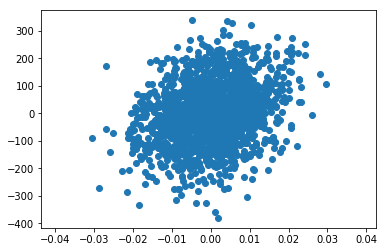

In [53]:
plt.scatter(X_train[:,0],Y_train)

In [138]:
ones=np.ones((X_train.shape[0],1))
XT=np.hstack((ones,X_train))
XT.shape

(1600, 6)

In [222]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    error = 0.0 
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    return grad/m 

def gradient_descent(X,y,learning_rate=0.1,max_iters=700):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = [] 
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        # Gradient Descent 
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad 
    return theta,error_list 


In [223]:
theta,error_list = gradient_descent(XT,Y_train)

In [224]:
theta_m=theta[0:5]
print(theta_m)
print(theta)

[ 0.31883538 18.11475165 60.97739619  1.7658944  28.13739399]
[ 0.31883538 18.11475165 60.97739619  1.7658944  28.13739399  1.00884132]


In [225]:
# Predictions
y_test = []

for i in range (X_test.shape[0]):
    pred = hypothesis(X_test[i],theta_m)
    y_test.append(pred)
y_test = np.array(y_test)

In [226]:
y_ = []

for i in range (XT.shape[0]):
    pred = hypothesis(XT[i],theta)
    y_.append(pred)
y = np.array(y_)

In [227]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100 


r2_score(Y_train,y_)

1.1288275074497256

In [228]:
print(y_test[0:5])

[-10.17166608  46.60419831   1.76383868   7.68333356  78.24034668]


In [187]:
id=np.arange(0,400)
Y_test2=pd.DataFrame({"Id":id,"target":y_test})
Y_test2.to_csv("submissions2.csv",index=False)

### Inbuilt Linear regression Model(96%)

In [11]:
from sklearn import linear_model

In [48]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)

In [61]:
predictions=lm.predict(X_test)
#predictions=np.around(predictions,decimals=6)
print(predictions.shape)

(400,)


In [57]:
id=np.arange(0,400)
target=predictions/100

In [59]:
Y_test=pd.DataFrame({"Id":id,"target":target})
Y_test.to_csv("submissions.csv",index=False)

In [60]:
lm.score(X_train,Y_train)

0.9660939669975616

In [100]:
print(target[0:5])

[ 121.32994875  125.12622892  -29.58968612  -54.16335895 -111.70661726]


### using random Forest

In [171]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=100,random_state=0)
cls.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [172]:
pred = cls.predict(X_test)
scores=cls.score(X_train, Y_train)
print(pred[0:5])
print(scores)

[ 175.23076262  262.02110598  147.63115695  167.36759496 -293.41237326]
0.9917498072130988


In [120]:
Y_test1=pd.DataFrame({"Id":id,"target":pred})
Y_test1.to_csv("submissions1.csv",index=False)